In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_ds="/content/drive/MyDrive/dataset/skinCancer/train"
test_ds="/content/drive/MyDrive/dataset/skinCancer/test"


# Data preprocessing
****

In [ ]:
os.listdir('/content/drive/MyDrive/dataset/skinCancer/train')

['benign', 'malignant']

In [ ]:
batch_size=32
img_size=224

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2467 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


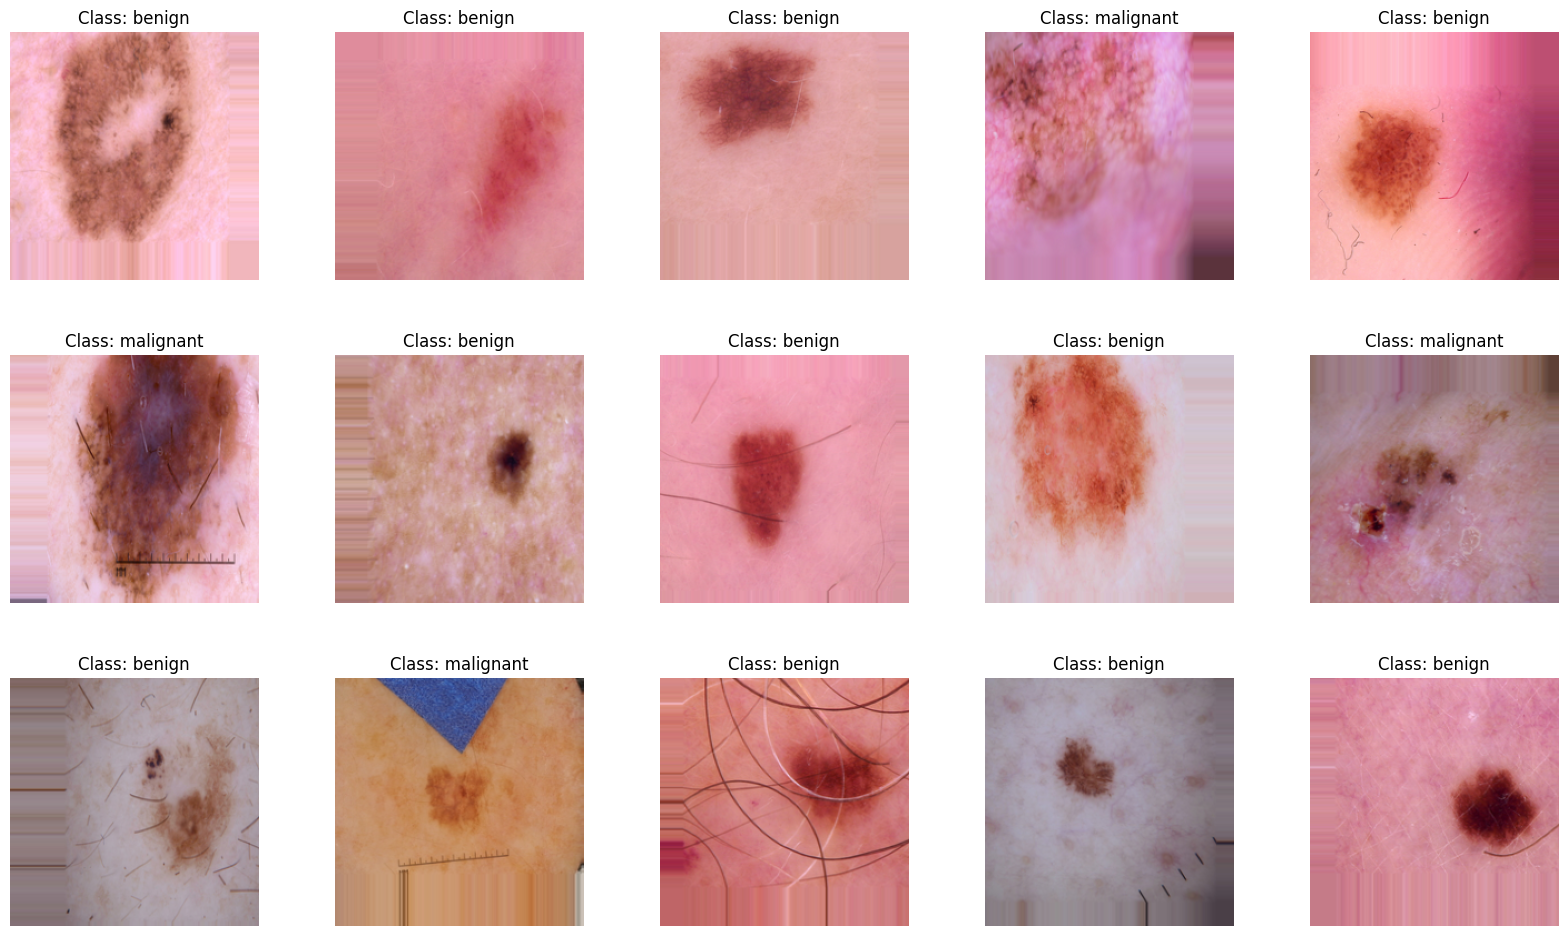

In [ ]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [ ]:
print(len(train_generator))
print(len(test_ds))


78
46


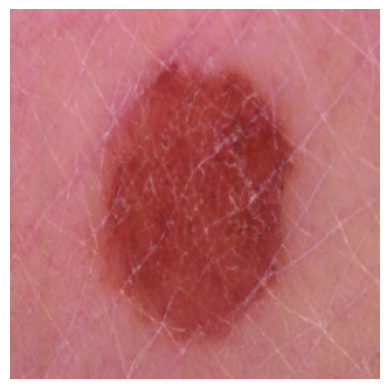

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/dataset/skinCancer/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# MobileNet Model

In [ ]:
from keras.layers import MaxPool2D

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

# Define input shape (e.g., 224x224 RGB image)
input_shape = (img_size, img_size, 3)

# Load the pre-trained MobileNet model (without the top layers)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers on top of the pre-trained MobileNet base
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling layer
x = Dense(4096, activation='relu')(x)  # Fully connected layer with 4096 units
x = Dropout(0.5)(x)  # Optional dropout for regularization
x = Dense(4096, activation='relu')(x)  # Another dense layer with 4096 units
x = Dropout(0.5)(x)  # Optional dropout

# Output layer for binary classification
output = Dense(2, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Optionally, freeze the layers of the base model to preserve pre-trained weights
for layer in base_model.layers:
    layer.trainable = False  # Freezing the base layers

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,216,770 (92.38 MB)

 Trainable params: 20,987,906 (80.06 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

#   Model summary

In [ ]:
# Print the model summary

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 24,216,770 (92.38 MB)

 Trainable params: 20,987,906 (80.06 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 731s 9s/step - accuracy: 0.5886 - loss: 0.6807 - val_accuracy: 0.7052 - val_loss: 0.5311
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 67s 621ms/step - accuracy: 0.7737 - loss: 0.4850 - val_accuracy: 0.8208 - val_loss: 0.4030
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 53s 625ms/step - accuracy: 0.7850 - loss: 0.4712 - val_accuracy: 0.8227 - val_loss: 0.3887
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 83s 644ms/step - accuracy: 0.8194 - loss: 0.4007 - val_accuracy: 0.8420 - val_loss: 0.3585
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 78s 604ms/step - accuracy: 0.8449 - loss: 0.3725 - val_accuracy: 0.8343 - val_loss: 0.3648
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 83s 616ms/step - accuracy: 0.8417 - loss: 0.3609 - val_accuracy: 0.8324 - val_loss: 0.3634
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 50s 579ms/step - accuracy: 0.8523 - loss: 0.3420 - val_accuracy: 0.8304 - val_loss: 0.3760
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 84s 601ms/step - accuracy: 0.8475 - loss: 0.3587 - val_accuracy: 

In [ ]:
n_categories = len(os.listdir('/content/drive/MyDrive/dataset/skinCancer/test'))# number of categories print(n_categories)

In [ ]:
n_categories

2

In [ ]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.657884,0.610630,0.705202,0.531061
1,0.777057,0.472765,0.820809,0.403041
2,0.798135,0.445338,0.822736,0.388743
3,0.825294,0.388924,0.842004,0.358513
4,0.839076,0.369981,0.834297,0.364805


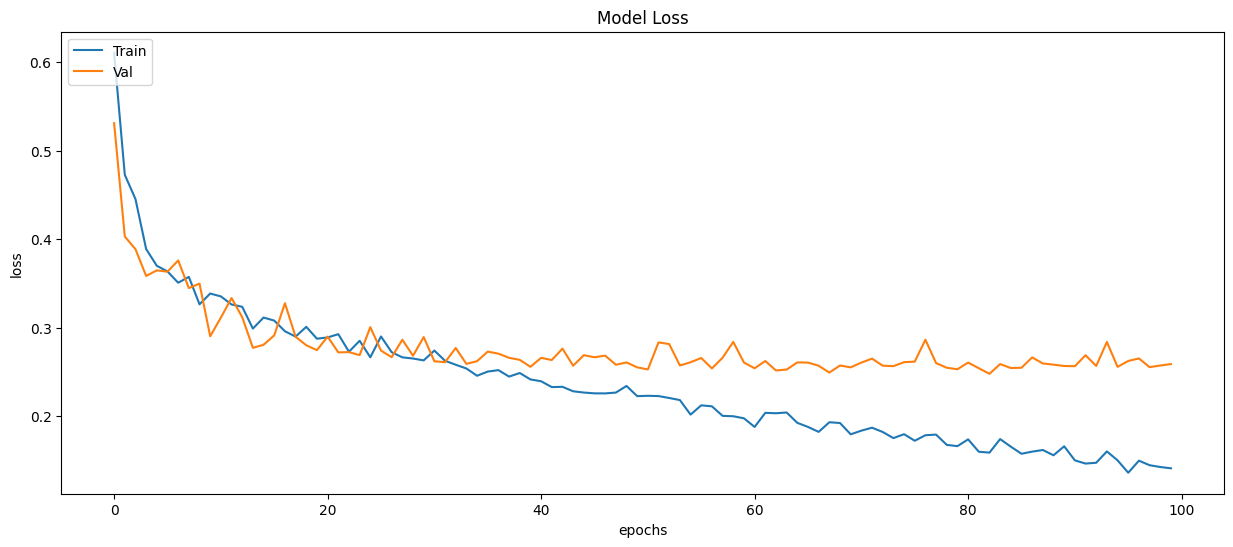

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

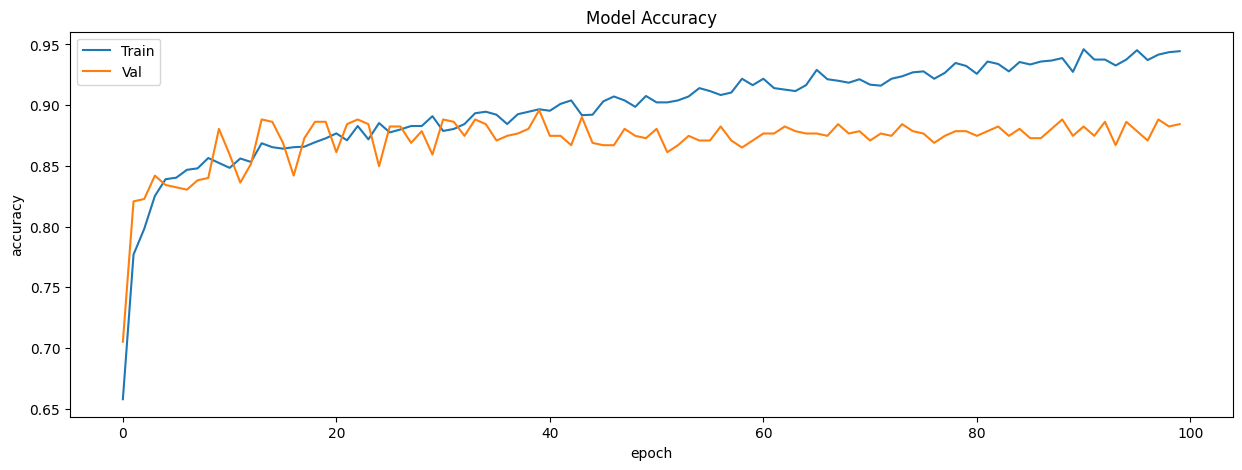

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step


In [ ]:
results =model.evaluate(test_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.8694 - loss: 0.2864


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,precision_score, recall_score, roc_curve, f1_score

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       219
           1       0.90      0.90      0.90       300

    accuracy                           0.88       519
   macro avg       0.88      0.88      0.88       519
weighted avg       0.88      0.88      0.88       519



In [ ]:
# Calculate metrics for each class
precision_0 = precision_score(y_test_1, y_pred_1, pos_label=0)
recall_0 = recall_score(y_test_1, y_pred_1, pos_label=0)
f1_0 = f1_score(y_test_1, y_pred_1, pos_label=0)
precision_1 = precision_score(y_test_1, y_pred_1, pos_label=1)
recall_1 = recall_score(y_test_1, y_pred_1, pos_label=1)
f1_1 = f1_score(y_test_1, y_pred_1, pos_label=1)

In [ ]:
# Calculate additional metrics
auc = roc_auc_score(y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(y_test_1, y_pred_1).ravel()
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
specificity = tn / (tn + fp)
fdr = fp / (fp + tp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)



# Print additional metrics for each class
print("Additional Metrics for Class 0:")
print(f"Precision: {precision_0:.2f}")
print(f"Recall: {recall_0:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_0:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

print("Additional Metrics for Class 1:")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

# Print average metrics
precision_avg = (precision_0 + precision_1) / 2
recall_avg = (recall_0 + recall_1) / 2
f1_avg = (f1_0 + f1_1) / 2

print("Average Metrics:")
print(f"Precision: {precision_avg:.2f}")
print(f"Recall: {recall_avg:.2f}")
print(f"F1 Score: {f1_avg:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}")




Additional Metrics for Class 0:
Precision: 0.86
Recall: 0.87
Specificity: 0.87
F1 Score: 0.86
FDR: 0.10
FNR: 0.10
FPR: 0.13

Additional Metrics for Class 1:
Precision: 0.90
Recall: 0.90
Specificity: 0.87
F1 Score: 0.90
FDR: 0.10
FNR: 0.10
FPR: 0.13

Average Metrics:
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
AUC: 0.88
Specificity: 0.87
FDR: 0.10
FNR: 0.10
FPR: 0.13


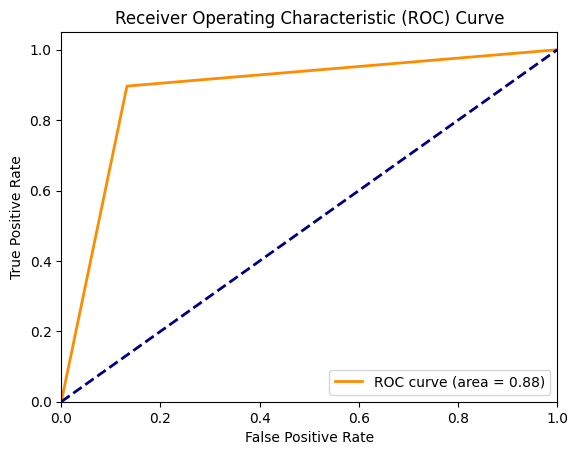

In [ ]:
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr_values, tpr_values, _ = roc_curve(y_test_1, y_pred_1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 854ms/step


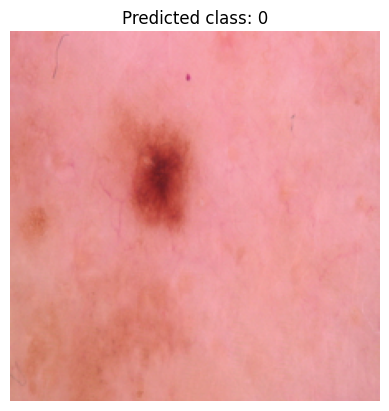

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/dataset/skinCancer/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [ ]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.9971643
Predicted class for 2.jpg : benign
Class probability: 0.9999813
Predicted class for 3.jpg : benign
Class probability: 0.9995348
Predicted class for 4.jpg : benign
Class probability: 0.99873275
Predicted class for 5.jpg : benign
Class probability: 0.88572466
Predicted class for 6.jpg : benign
Class probability: 0.99949646
Predicted class for 7.jpg : benign
Class probability: 0.99852496
Predicted class for 8.jpg : benign
Class probability: 0.97194177
Predicted class for 9.jpg : benign
Class probability: 0.9998276
Predicted class for 10.jpg : benign
Class probability: 0.98673576
Predicted class for 11.jpg : benign
Class probability: 0.97010225
Predicted class for 12.jpg : benign
Class probability: 0.99391586
Predicted class for 13.jpg : malignant
Class probability: 0.8912562
Predicted class for 14.jpg : benign
Class probability: 0.99985397
Predicted class for 15.jpg : benign
Class probability: 0.8539793
Predicted class for 16